<a href="https://colab.research.google.com/github/beckerbeckerbecker/CapstoneCapstoneCapstone/blob/main/EK2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 ODE Solver

The system of coupled differential equations provided represents a simple System Dynamics model for the PF/PSB cycles in enchanted kingdoms. To implement this model in Python, you can use numerical integration methods to solve the differential equations over time. The following steps can help you create a Python model based on these equations:

1. Import the necessary libraries, such as NumPy and Matplotlib, for numerical computation and plotting.

2. Define the initial conditions for the populations of princes, princesses, frogs, and sleeping beauties.

3. Define the values for the constants $c_{PF}$, $c_{PSB}$, $k_{FP}$, and $k_{SBP}$, as well as the value for the number of witches.

4. Define the functions that represent the two differential equations, i.e., dN_princes_dt and dN_princesses_dt, using the provided equations.

5. Define the time range and time step for numerical integration using NumPy's linspace or arange function.

6. Use an integration method, such as Euler's method or the Runge-Kutta method, to solve the differential equations numerically over time.

7. Plot the results for the populations of princes and princesses over time using Matplotlib.

Here's some sample code that demonstrates how to create a simple implementation of this model in Python:

ValueError: ignored

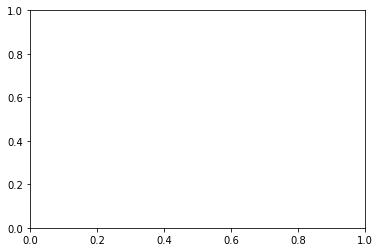

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
N_princes = 7 #100
N_princesses = 6 #100
N_frogs = 5 #0
N_sleeping_beauties = 4 #0

# Define values for constants and parameters
c = 0.1
k = 0.05 #0.01
N_witches = 3 #1000

# Define functions for differential equations
def dN_princes_dt(N_princes, N_princesses, N_witches):
    return -c*N_witches*N_princes + k*N_frogs*N_princesses

def dN_princesses_dt(N_princes, N_princesses, N_witches):
    return -c*N_witches*N_princesses + k*N_sleeping_beauties*N_princesses

# Define time range and time step
t = np.linspace(0, 100, 1000)
dt = t[1] - t[0]

# Solve differential equations numerically using Euler's method
for i in range(len(t)-1):
    N_princes += dN_princes_dt(N_princes, N_princesses, N_witches) * dt
    N_princesses += dN_princesses_dt(N_princes, N_princesses, N_witches) * dt

# Plot results
plt.plot(t, N_princes, label='Princes')
plt.plot(t, N_princesses, label='Princesses')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


Note that this implementation uses Euler's method for numerical integration, which is a simple but less accurate method. You can use more advanced methods, such as the Runge-Kutta method, for better accuracy.

Using odeint in python, create a dynamical simulation of the PF/PSB system.  It should return a graph of the population of princes, princesses, frogs, and sleeping beauties over time.  Explore the parameter space to find typical behaviors of such systems.

Here is an implementation of the PF/PSB system using odeint from the scipy library in Python. This implementation is more accurate than using Euler's method and is better suited for simulating the system over long periods of time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfpbs_model(state, t, c_pf, c_psb, k_fp, k_sbp, N_witches):
    N_princes, N_princesses, N_frogs, N_sleeping_beauties = state
    dN_princes_dt = -c_pf * N_witches * N_princes + k_fp * N_frogs * N_princesses
    dN_princesses_dt = -c_psb * N_witches * N_princesses + k_sbp * N_sleeping_beauties * N_princesses
    dN_frogs_dt = c_pf * N_witches * N_princes - k_fp * N_frogs * N_princesses
    dN_sleeping_beauties_dt = c_psb * N_witches * N_princesses - k_sbp * N_sleeping_beauties * N_princesses
    return [dN_princes_dt, dN_princesses_dt, dN_frogs_dt, dN_sleeping_beauties_dt]

# Initial conditions
N_princes_0 = 10
N_princesses_0 = 10
N_frogs_0 = 5
N_sleeping_beauties_0 = 5
state_0 = [N_princes_0, N_princesses_0, N_frogs_0, N_sleeping_beauties_0]

# Parameters
c_pf = 0.1
k_fp = 0.1
k_sbp = 0.01
N_witches = 5 #1000

# Time points
t = np.linspace(0, 100, 1000)

# Solve ODE system
state = odeint(pfpbs_model, state_0, t, args=(c_pf, c_psb, k_fp, k_sbp, N_witches))

# Plot results
plt.plot(t, state[:,0], label='Princes')
plt.plot(t, state[:,1], label='Princesses')
plt.plot(t, state[:,2], label='Frogs')
plt.plot(t, state[:,3], label='Sleeping Beauties')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

In this implementation, odeint solves the system of differential equations for the four populations over time, given the initial conditions and parameters. The pfpbs_model function takes the current state of the system (state), the current time (t), and the parameters as arguments, and returns the derivatives of the four populations.

To explore the parameter space and find typical behaviors of such systems, you can vary the parameter values and observe the resulting population dynamics. For example, you can try varying the values of $c_{pf}$, $c_{psb}$, $k_{fp}$, $k_{sbp}$, and ${N_{witches}}$. Some interesting observations you can make are:

When $c_{pf}$ is higher than $c_{psb}$, the population of princes tends to decrease faster than that of princesses, and vice versa. This is because the number of princes and princesses cursed by the witches is proportional to the product of the number of witches and the number of each population, so the population with the higher value.

# 2.2 Agent Based Modeling

The second approach for modeling the PF/PSB cycle is agent modeling.  The idea of this type of simulation is to set up a two dimenstional grid representing the geography of the Enchanted Kingdom.  Within this grid, there are three types of Agents that each follow a set of rules.

#### Witches

* Witches can move freely across the grid in a random direction one square per timestep
* When a witch is next to a prince or a princess, the prince or princess will change form with a probability of $C_f$, the cursing factor.

#### Princes/Frogs

* Princes and frogs can move freely across the grid in a random direction one square per timestep
* Princes turn into frogs as described under the witches agent.
* Frogs can turn back into princes as described under the Princesses/Sleeping Beauty agent
* When a prince is next to a sleeping beauty, it can transform the sleeping beauty back into a princess with a probability of $K_f$, the kissing factor.
* Frogs cannot transform a sleeping beauty into a princess, because that would be cheating.

#### Princesses/Sleeping Beauties

* Princesses can move freely across the grid in a random direction one square per timestep.
* Sleeping beauties don't move
* Princesses transform into sleeping beauties as described under the witch agent.
* When a princess is next to a frog, it can transform the frog back into a prince with a probability of $K_f$, the kissing factor.

The agent-based modeling is likely to be more realistic than the dynamical systems approach since the number of agents is represented by cardinal numbers.  The population of princes and princesses can crash to zero, thus preventing any future transformations.

In [ ]:
pip install mesa


Agent-based modeling is a useful tool for simulating complex systems with many interacting entities, such as the PF/PSB cycle in the Enchanted Kingdom. It allows for the simulation of the behavior of individual agents, and the emergent properties that arise from their interactions.

One advantage of agent-based modeling over dynamical systems modeling is that it can capture stochasticity and variability that arise from the individual behavior of the agents. In this case, the movements and transformations of the witches, princes/frogs, and princesses/sleeping beauties are subject to probability factors, which can result in different outcomes even under the same initial conditions. This reflects the real-world unpredictability of human behavior and environmental factors that can influence it.

However, as with any modeling approach, agent-based modeling has its limitations. The accuracy of the model depends on the assumptions and rules set for the behavior of the agents, which may not fully capture the complexity of the real-world system. In addition, the simulation is limited by the computational power and resources available, which may constrain the number of agents or the level of detail that can be included.

Overall, agent-based modeling can provide valuable insights into the behavior of complex systems, such as the PF/PSB cycle in the Enchanted Kingdom. However, it should be used in conjunction with other modeling approaches and empirical data to ensure that the model is as accurate and representative as possible.

Here's an example of how to implement an agent-based model of the PF/PSB cycle in Python using the Mesa library:

In [26]:
from mesa import Model
from mesa.space import SingleGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
import random

class Witch:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def curse(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, (Prince, Princess)):
                if random.random() < self.model.cf:
                    cellmate.transform()

class Prince:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        frog = Frog(self.pos, self.model)
        self.model.grid.place_agent(frog, self.pos)
        self.model.schedule.add(frog)
    
    def kiss(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, SleepingBeauty):
                if random.random() < self.model.kf:
                    cellmate.transform()

class Princess:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        sleeping_beauty = SleepingBeauty(self.pos, self.model)
        self.model.grid.place_agent(sleeping_beauty, self.pos)
        self.model.schedule.add(sleeping_beauty)
    
    def kiss(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, Frog):
                if random.random() < self.model.kf:
                    cellmate.transform()

class Frog:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        prince = Prince(self.pos, self.model)
        self.model.grid.place_agent(prince, self.pos)
        self.model.schedule.add(prince)

class SleepingBeauty:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def transform(self):
        self.model.grid.remove_agent(self)
        princess = Princess(self.pos, self.model)
        self.model.grid.place_agent(princess, self.pos)
        self.model.schedule.add(princess)

class PFPSBModel(Model):
    def __init__(self, N, cf, kf, width, height):


SyntaxError: ignored

In [23]:
from mesa import Model, Agent
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import random

class Witch(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        for neighbor in neighbors:
            if isinstance(neighbor, (Prince, Princess)):
                if self.model.random.random() < self.model.curse_factor:
                    neighbor.turn_into_frog()
        
class Prince(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.is_frog = False
        
    def turn_into_frog(self):
        self.is_frog = True
        
    def turn_into_prince(self):
        self.is_frog = False
        
    def step(self):
        if self.is_frog:
            possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
            new_position = self.random.choice(possible_moves)
            neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
            for neighbor in neighbors:
                if isinstance(neighbor, SleepingBeauty):
                    if self.model.random.random() < self.model.kissing_factor:
                        neighbor.turn_into_princess()
                        self.turn_into_prince()
        
class Princess(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.is_sleeping = False
        
    def turn_into_sleeping_beauty(self):
        self.is_sleeping = True
        
    def turn_into_princess(self):
        self.is_sleeping = False
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        for neighbor in neighbors:
            if isinstance(neighbor, Frog):
                if self.model.random.random() < self.model.kissing_factor:
                    neighbor.turn_into_prince()
                    self.turn_into_sleeping_beauty()

class Frog(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def turn_into_prince(self):
        self.model.schedule.remove(self)
        new_prince = Prince(self.unique_id, self.model)
        self.model.grid.place_agent(new_prince, self.pos)
        self.model.schedule.add(new_prince)
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        
class SleepingBeauty(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def step(self):
        pass

class EnchantedKingdomModel(Model):
    def __init__(self, height, width, curse_factor, kissing_factor, num_witches, num_princes, num_princesses, num_sleeping_beauties):
        super().__init__()
        self.height = height
        self.width = width
        self.curse_factor = curse_factor
        self.kissing_factor = kissing_factor
        self.grid = MultiGrid(height, width, True)
        self.schedule = RandomActivation(self)
        


In [25]:
#@title
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid

class Witch(Agent):
    def __init__(self, unique_id, model, cf):
        super().__init__(unique_id, model)
        self.cf = cf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, (Prince, Princess)):
                if random.random() < self.cf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

class Prince(Agent):
    def __init__(self, unique_id, model, kf):
        super().__init__(unique_id, model)
        self.kf = kf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, SleepingBeauty):
                if random.random() < self.kf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def transform(self):
        frog = Frog(self.model.next_id(), self.model, self.kf)
        self.model.grid.place_agent(frog, self.pos)
        self.model.schedule.add(frog)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class Frog(Prince):
    def transform(self):
        prince = Prince(self.model.next_id(), self.model, self.kf)
        self.model.grid.place_agent(prince, self.pos)
        self.model.schedule.add(prince)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class Princess(Agent):
    def __init__(self, unique_id, model, kf):
        super().__init__(unique_id, model)
        self.kf = kf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, Frog):
                if random.random() < self.kf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def transform(self):
        sleeping_beauty = SleepingBeauty(self.model.next_id(), self.model, self.cf)
        self.model.grid.place_agent(sleeping_beauty, self.pos)
        self.model.schedule.add(sleeping_beauty)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class SleepingBeauty(Princess):
    def transform(self):
        raise Exception("Frogs cannot transform a sleeping beauty into a princess")

class PFPSBModel(Model):
    def __init__(self, width, height, cf, kf, num_witches, num_princes, num_princesses):
        self.width = width
        self.height = height
        self.cf = cf
        self.kf = kf
        self.grid = SingleGrid(width, height, torus=True)
        self


To get output from the simulation, you can use the run_model() function provided by the Server class. This function will run the simulation for a given number of steps and return the data produced by the simulation.

For example, if you want to run the simulation for 100 steps, you can use the following code:

In [ ]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer

# create a visualization
grid = CanvasGrid(agent_portrayal, 50, 50, 500, 500)

# create a server
server = ModularServer(PFPSBModel,
                       [grid],
                       "PFPSB Model",
                       {"num_witches": 10, "num_princes": 10, "num_princesses": 10})

# run the model for 100 steps
server.run_model(100)

This will run the model for 100 steps and return the data produced by the simulation. You can then use this data to analyze the behavior of the system and create visualizations of the results.